In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import sqlite3

In [5]:
def minimalhbargraph(title, fontsize=35):
    """Disables axis ticks and labels, outer axis 'box', sets seaborn context.
       Makes the graph very minimalist.
    """
    sns.set_context('poster')
    ax.set_ylabel('')
    ax.set_xlabel("")
    ax.set_yticks([])
    ax.set_xticks([])
    plt.tight_layout()
    ax.axis('off')
    ax.set_title(title, fontsize=fontsize)

In [6]:
con = sqlite3.connect('csv_database.db')

In [7]:
df_fromstation_count = pd.read_sql_query('''
                        SELECT from_station_name, COUNT(from_station_name)
                        FROM data
                        GROUP BY from_station_name''', con)

In [8]:
df_fromstation_count.tail(5)

,from_station_name,COUNT(from_station_name)
651,Wood St & Taylor St,19127
652,Woodlawn Ave & 55th St,8759
653,Woodlawn Ave & 75th St,15
654,Woodlawn Ave & Lake Park Ave,1929
655,Yates Blvd & 75th St,189


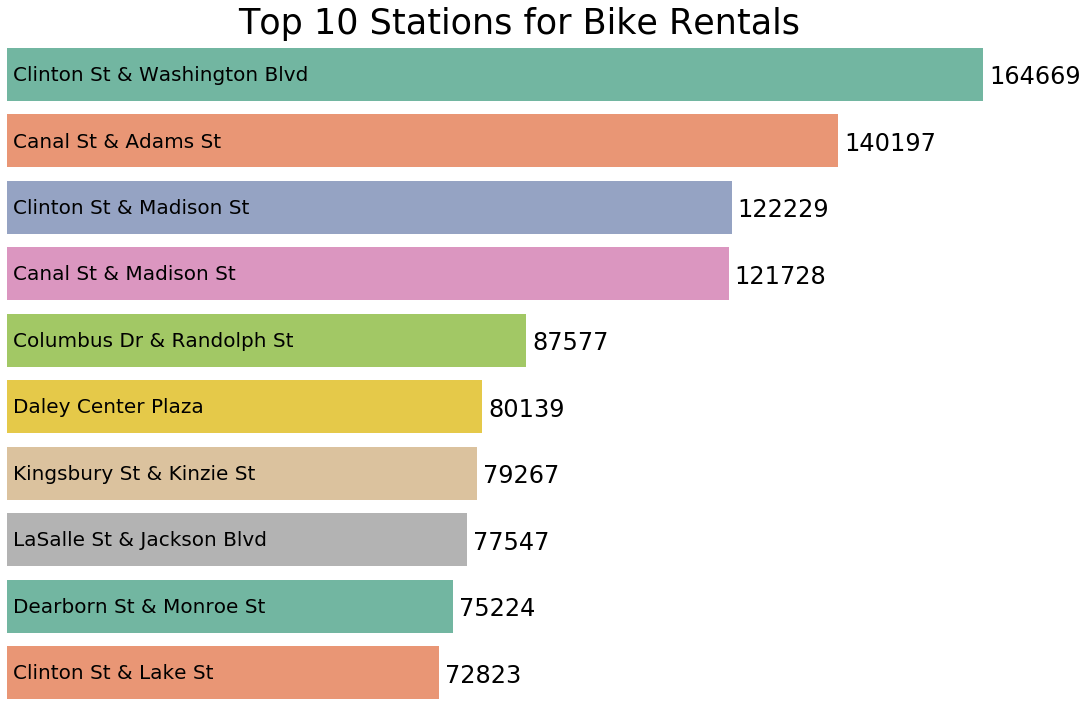

In [9]:
df = df_fromstation_count.sort_values('COUNT(from_station_name)', ascending=False).head(10).set_index('from_station_name')
plt.figure(figsize=(15,10))
ax = sns.barplot(df['COUNT(from_station_name)'], df.index, palette='Set2')
minimalhbargraph(title="Top 10 Stations for Bike Rentals")
num = 0
for i in ax.patches:
    ax.text(i.get_width()+1000, i.get_y()+0.55, str(round(i.get_width()))[:-2], fontsize = 24, color = 'k')
    ax.text(1000 , i.get_y()+0.5, str(df.index[num]), fontsize = 20, color = 'k')
    num += 1

In [10]:
df_users_gender_count = pd.read_sql_query('''
                        SELECT gender, COUNT(gender) as count_gender
                        FROM data
                        GROUP BY gender''', con, index_col="gender")

In [11]:
df_users_gender_count.tail(5)

,count_gender
gender,
Female,2378675
Male,7116560


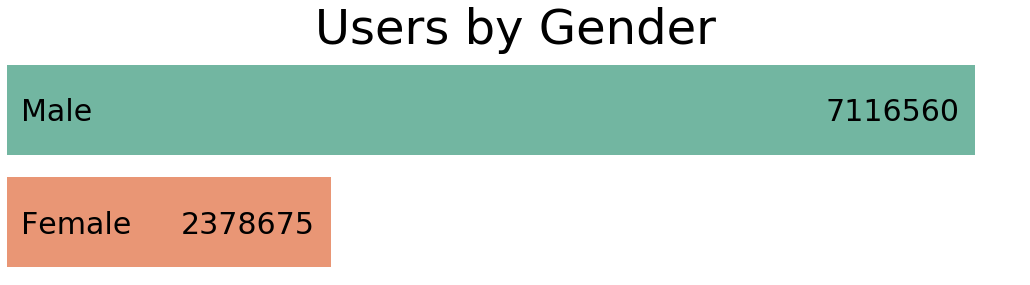

In [12]:
df = df_users_gender_count.sort_values('count_gender', ascending=False)
plt.figure(figsize=(15,4))
ax = sns.barplot(df['count_gender'], df.index, palette='Set2')
minimalhbargraph("Users by Gender", fontsize=48)
num = 0
for i in ax.patches:
    ax.text(i.get_width()-1100000, i.get_y()+0.5, str(round(i.get_width()))[:-2], fontsize = 30, color = 'k')
    ax.text(100000 , i.get_y()+0.5, str(df.index[num]), fontsize = 30, color = 'k')
    num += 1

In [20]:
df_longest_trip_duration = pd.read_sql_query('''
                        SELECT tripduration
                        FROM data
                        ORDER BY tripduration
                        DESC LIMIT 5''', con)

In [35]:
df_longest_trip_duration.head(10)

,tripduration
0,2.0
1,2.0
2,2.0
3,2.0
4,2.0


In [24]:
df_shortest_trip_duration = pd.read_sql_query('''
                        SELECT tripduration
                        FROM data
                        ORDER BY tripduration
                        ASC LIMIT 5''', con)

In [34]:
df_shortest_trip_duration.head(10)

,tripduration
0,2.0
1,2.0
2,2.0
3,2.0
4,2.0


In [38]:
df_trips_by_month = pd.read_sql_query('''
                        SELECT COUNT(trip_id) as num_trips, month, year
                        FROM data
                        GROUP BY year, month''', con)

In [40]:
df_trips_by_month['date'] = pd.to_datetime([f'{y}-{m}-01' for y, m in zip(df_trips_by_month.year, df_trips_by_month.month)])

In [47]:
df_trips_by_month.tail()

,num_trips,month,year,date,ym
43,406964,8,2017,2017-08-01,2025
44,365210,9,2017,2017-09-01,2026
45,291880,10,2017,2017-10-01,2027
46,174391,11,2017,2017-11-01,2028
47,117267,12,2017,2017-12-01,2029


(array([735234., 735415., 735599., 735780., 735964., 736146., 736330.,
        736511., 736695.]), <a list of 9 Text xticklabel objects>)

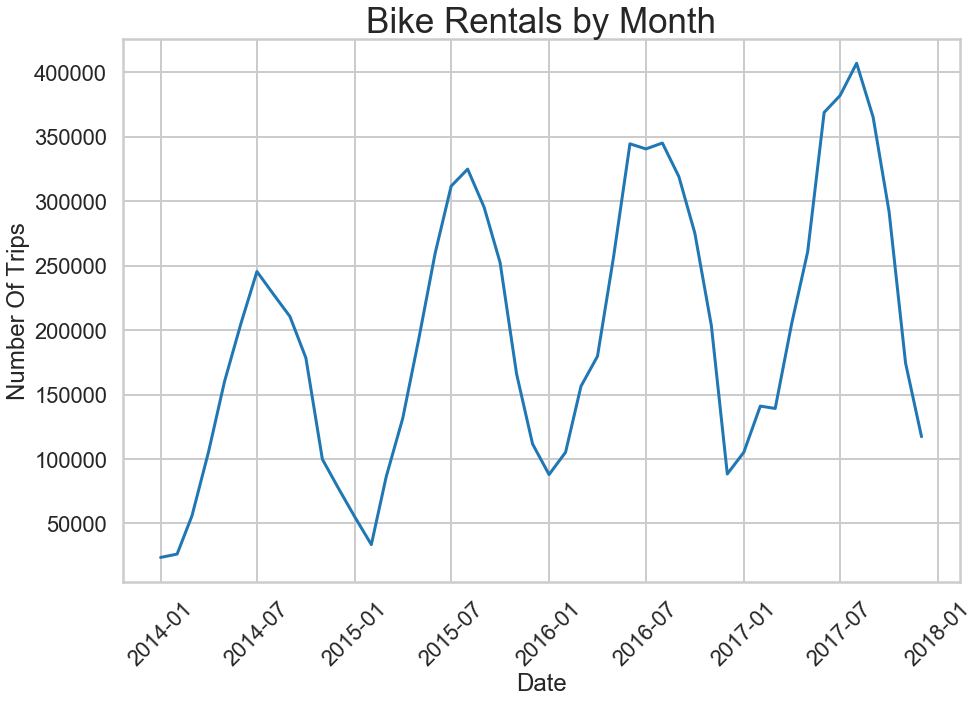

In [67]:
df = df_trips_by_month
sns.set_style("whitegrid")
plt.figure(figsize=(15,10))
ax = sns.lineplot(df['date'], df['num_trips'], palette='Set2')
ax.set_title("Bike Rentals by Month", fontsize=35)
plt.ylabel('Number Of Trips')
plt.xlabel('Date')
plt.xticks(rotation=45)